In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def B_sheet(r_a,r_b,r_2,alpha):

    pp = alpha*np.cross(r_2 - r_a,n)
    A = np.dot(r_2-r_a,r_2-r_a)
    B = np.dot(r_2 - r_a,r_b - r_a)
    C = np.dot(r_b - r_a,r_b - r_a)
    D = np.dot(r_2 - r_a,pp) 
    P = alpha*np.cross((r_b - r_a),n) 

    a1 = A*C - 2*B*C +C**2
    b1 = -2*C*D
    c1 = (alpha**2)*C**2
    p1 = (C-B)**2
    d1 = b1**2 - 4*(a1 + p1)*c1


    a2 = A*C
    b2 = -2*C*D
    c2 = (alpha**2)*C**2

    ru = a1 + b1*(1/2) + c1*(1/2)**2 
    rl = a2 + b2*(-1/2) + c2*(-1/2)**2

    su = 0.5
    sl = 0.5

    if p1 > 0:
        I1 = np.arctan(np.sqrt(ru/p1)) -  np.arctan(np.sqrt(rl/p1))
    else:
        I_u1 = np.log(np.sqrt(-p) - np.sqrt(ru)/(sqrt(-p) + np.sqrt(ru)))
        I_l1 = np.log(np.sqrt(-p) - np.sqrt(rl)/(sqrt(-p) + np.sqrt(rl)))
        I1 = 1/(2*np.sqrt(-p))*(I_u1 - I_l1)
    if p1*d1 > 0:
        I2 = - np.arctan(np.sqrt(p1/dq))*(B1 + 2*C1*su/np.sqrt(Ru)) + np.arctan(np.sqrt(p1/dq))*(B1 + 2*C1*sl/np.sqrt(Rl))
    else:
        if p1 >0:
            I2_u = np.log((np.sqrt(-d1)*np.sqrt(ru) + np.sqrt(p1)*(b1 + 2*c1*(0.5)))/(np.sqrt(-d1)*np.sqrt(ru)- np.sqrt(p1)*(b1 + 2*c1*(0.5)))) 
            I2_l = np.log((np.sqrt(-d1)*np.sqrt(rl) + np.sqrt(p1)*(b1 + 2*c1*(-0.5)))/(np.sqrt(-d1)*np.sqrt(rl)- np.sqrt(p1)*(b1 + 2*c1*(-0.5)))) 
            I2 = 1/(2*1j)*(I2_u - I2_l)
        else:
            I2_u = np.log((np.sqrt(d1)*np.sqrt(ru) + np.sqrt(-p1)*(b1 + 2*c1*(0.5)))/(np.sqrt(d1)*np.sqrt(ru)- np.sqrt(-p1)*(b1 + 2*c1*(0.5)))) 
            I2_l = np.log((np.sqrt(d1)*np.sqrt(rl) + np.sqrt(-p1)*(b1 + 2*c1*(-0.5)))/(np.sqrt(d1)*np.sqrt(rl)- np.sqrt(-p1)*(b1 + 2*c1*(-0.5))))
            I2 =  1/(2*1j)*(I2_u - I2_l)
        U1 = B
        v1 = C-B
        if  (c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1) >  0:
            integ_1 = (U1/c1)*I1  - I2*(2*(v1*c1)-U1*b1)/(np.sqrt((c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1)))
        else:
            integ_1 = (U1/c1)*I1  - I2*(2*(v1*c1)-U1*b1)/(1J*np.sqrt(abs((c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1))))
        B_s = (Br*alpha*C/(4*np.pi))*integ_1*(np.cross(r_b - r_a,r_2 - r_a)) + (Br*alpha/(4*np.pi))*integ_1

    return np.real(B_s)
   
    


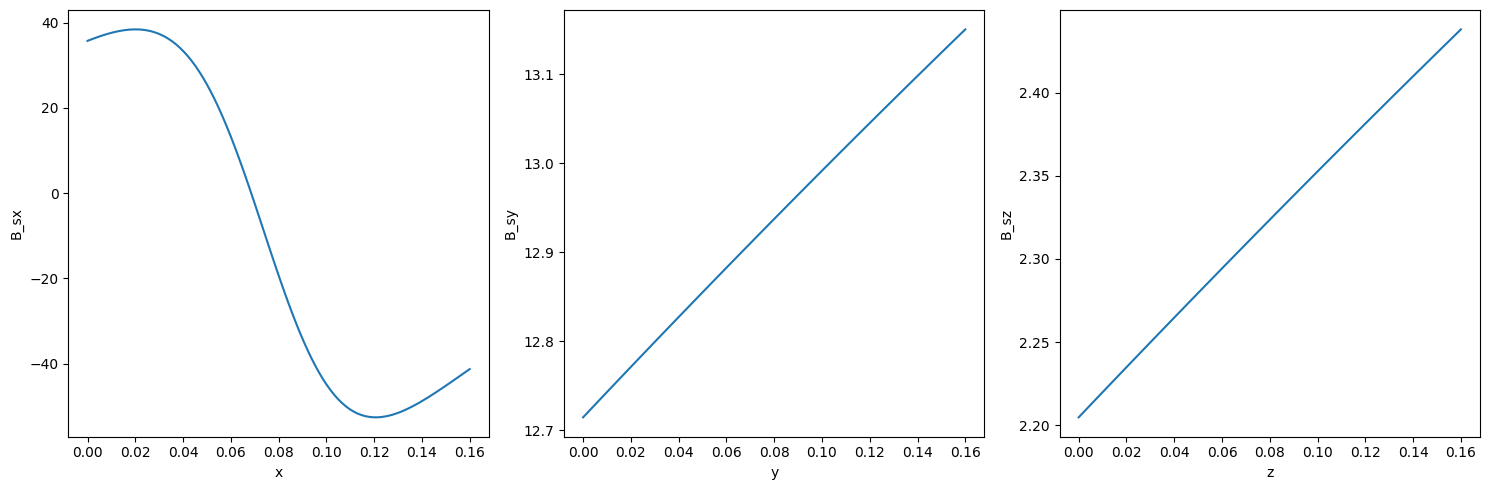

In [53]:
r_a = np.array([0.002,0.003,0.003])
r_b = np.array([4,0.005,0.003])
n = np.array([0,0,1])
alpha = (1e-3)/(np.linalg.norm(r_b - r_a))
Br = 1
B_s = B_sheet(r_a,r_b,r_2,alpha)
x = np.linspace(-0,0.16,100)
B_slx= []
B_sly = []
B_slz = []
for i in x:
    r_2x = np.array([i,3,9])
    r_2y = np.array([3,i,9])
    r_2z = np.array([3,9,i])
    B_sx = B_sheet(r_2x,r_b,r_2,alpha)
    B_sy = B_sheet(r_2y,r_b,r_2,alpha)
    B_sz = B_sheet(r_2z,r_b,r_2,alpha)

    B_slx.append(B_sx[0])
    B_sly.append(B_sy[1])
    B_slz.append(B_sz[2])

fig,ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(x,B_sl)
ax[1].plot(x,B_sly)
ax[2].plot(x,B_slz)
ax[0].set_ylabel('B_sx')
ax[1].set_ylabel('B_sy')
ax[2].set_ylabel('B_sz')
ax[0].set_xlabel('x')
ax[1].set_xlabel('y')
ax[2].set_xlabel('z')

plt.tight_layout()

In [37]:
pp = alpha*np.cross(r_2 - r_a,n)
A = np.dot(r_2-r_a,r_2-r_a)
B = np.dot(r_2 - r_a,r_b - r_a)
C = np.dot(r_b - r_a,r_b - r_a)
D = np.dot(r_2 - r_a,pp) 
P = alpha*np.cross((r_b - r_a),n) 

a1 = A*C - 2*B*C +C**2
b1 = -2*C*D
c1 = (alpha**2)*C**2
p1 = (C-B)**2
d1 = b1**2 - 4*(a1 + p1)*c1
(c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1)

-329759610.51852006

0.00282842712474619